In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('jewelry.csv')
df.head()

,index,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,0,jewelry,Montres connectées,Global Version Xiaomi Mi bande 5,42.99,99.99,USD,57,27,False,...,Noir,NaN,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/xiaomi-smart-watches-49...,1692610,SKUE46513
1,1,jewelry,Colliers,Collier long pendentif géométrique,17.61,33.55,USD,48,518,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/necklaces-4047/p-151378...,1513785,SKUC71348
2,2,jewelry,Montres connectées,Montre intelligente ECG EKG,66.29,166.14,USD,60,505,False,...,Rose,rouge,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/bakeey-smart-watches-49...,1409396,SKUA96208
3,3,jewelry,Colliers,Collier à pampilles blanc,9.99,24.99,USD,60,140,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/necklaces-4047/p-168972...,1689722,SKUF37878
4,4,jewelry,Boucles d'oreilles,Clips d'oreilles en verre gemme,5.99,10.99,USD,46,107,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/earrings-4041/p-1674308...,1674308,SKUE92041


In [3]:
df.columns

Index(['index', 'category', 'subcategory', 'name', 'current_price',
       'raw_price', 'currency', 'discount', 'likes_count', 'is_new', 'brand',
       'brand_url', 'codCountry', 'variation_0_color', 'variation_1_color',
       'variation_0_thumbnail', 'variation_0_image', 'variation_1_thumbnail',
       'variation_1_image', 'image_url', 'url', 'id', 'model'],
      dtype='object')

In [4]:
df.isnull().sum()

index                       0
category                    0
subcategory                 0
name                        0
current_price               0
raw_price                   0
currency                    0
discount                    0
likes_count                 0
is_new                      0
brand                    4294
brand_url                4298
codCountry                549
variation_0_color        1167
variation_1_color        2378
variation_0_thumbnail    1167
variation_0_image        1167
variation_1_thumbnail    2378
variation_1_image        2378
image_url                   0
url                         0
id                          0
model                       0
dtype: int64

In [5]:
df.shape

(4853, 23)

In [6]:
df.isnull().sum()/df.shape[0]

index                    0.000000
category                 0.000000
subcategory              0.000000
name                     0.000000
current_price            0.000000
raw_price                0.000000
currency                 0.000000
discount                 0.000000
likes_count              0.000000
is_new                   0.000000
brand                    0.884814
brand_url                0.885638
codCountry               0.113126
variation_0_color        0.240470
variation_1_color        0.490006
variation_0_thumbnail    0.240470
variation_0_image        0.240470
variation_1_thumbnail    0.490006
variation_1_image        0.490006
image_url                0.000000
url                      0.000000
id                       0.000000
model                    0.000000
dtype: float64

In [7]:
for column in df.columns:
    print(f'{column}:{df[column].value_counts()}')
    print('------------------------------------------')

index:index
0       1
3242    1
3240    1
3239    1
3238    1
       ..
1617    1
1616    1
1615    1
1614    1
4852    1
Name: count, Length: 4853, dtype: int64
------------------------------------------
category:category
jewelry    4853
Name: count, dtype: int64
------------------------------------------
subcategory:subcategory
Boucles d'oreilles               1097
Colliers                          759
Bracelets                         496
Montres pour homme                425
Bagues                            371
Montres pour femme                352
Bracelets pour homme              194
Montres connectées                163
Accessoires des cheveux           148
Sets de bijoux                    135
Bracelets de cheville             121
Broches et épingles                84
Colliers pour homme                80
Bagues pour homme                  75
Bijouterie DIY                     56
Porte-clefs & Décoration           44
Bijoux de corps                    43
Fine Copper           

In [8]:
df.columns

Index(['index', 'category', 'subcategory', 'name', 'current_price',
       'raw_price', 'currency', 'discount', 'likes_count', 'is_new', 'brand',
       'brand_url', 'codCountry', 'variation_0_color', 'variation_1_color',
       'variation_0_thumbnail', 'variation_0_image', 'variation_1_thumbnail',
       'variation_1_image', 'image_url', 'url', 'id', 'model'],
      dtype='object')

In [9]:
data=df[['subcategory','current_price','discount','likes_count']]
data.head()

,subcategory,current_price,discount,likes_count
0,Montres connectées,42.99,57,27
1,Colliers,17.61,48,518
2,Montres connectées,66.29,60,505
3,Colliers,9.99,60,140
4,Boucles d'oreilles,5.99,46,107


In [10]:
for column in data.columns:
    print(f'{column}:{data[column].value_counts()}')
    print('--------------------------------------------')

subcategory:subcategory
Boucles d'oreilles               1097
Colliers                          759
Bracelets                         496
Montres pour homme                425
Bagues                            371
Montres pour femme                352
Bracelets pour homme              194
Montres connectées                163
Accessoires des cheveux           148
Sets de bijoux                    135
Bracelets de cheville             121
Broches et épingles                84
Colliers pour homme                80
Bagues pour homme                  75
Bijouterie DIY                     56
Porte-clefs & Décoration           44
Bijoux de corps                    43
Fine Copper                        39
Bagues de couple                   30
Coffrets & Sacs de bijoux          24
Montres de poche                   23
Montres couple                     16
Fine Copper2                       12
Bracelets de couple                10
Mascarade & Cosplay                 9
Zinc Alloy                

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subcategory    4853 non-null   object 
 1   current_price  4853 non-null   float64
 2   discount       4853 non-null   int64  
 3   likes_count    4853 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 151.8+ KB


In [12]:
data.apply(pd.isnull).sum()

subcategory      0
current_price    0
discount         0
likes_count      0
dtype: int64

In [13]:
data.describe()

,current_price,discount,likes_count
count,4853.000000,4853.000000,4853.000000
mean,16.452732,53.131877,166.145889
std,24.289653,11.166705,294.635126
min,0.260000,0.000000,0.000000
25%,7.840000,48.000000,37.000000
50%,10.350000,50.000000,83.000000
75%,16.260000,58.000000,177.000000
max,601.790000,98.000000,5966.000000


In [14]:
data.groupby('subcategory').mean(numeric_only=True)

,current_price,discount,likes_count
subcategory,,,
Accessoires,20.542222,48.777778,61.555556
Accessoires des cheveux,11.264932,51.871622,153.202703
Bagues,9.948544,52.857143,237.517520
Bagues de couple,9.525667,53.666667,198.833333
Bagues pour homme,14.288400,50.426667,182.093333
Bijouterie,8.856667,56.333333,23.000000
Bijouterie DIY,9.443393,49.821429,128.071429
Bijoux de corps,11.142326,56.069767,117.837209
Boucles d'oreilles,9.415825,53.506837,184.063810


In [15]:
categorical_columns,numerical_columns=[],[]

In [16]:
for column in data.columns:
    if data[column].dtype=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [17]:
categorical_columns

['subcategory']

In [18]:
numerical_columns

['current_price', 'discount', 'likes_count']

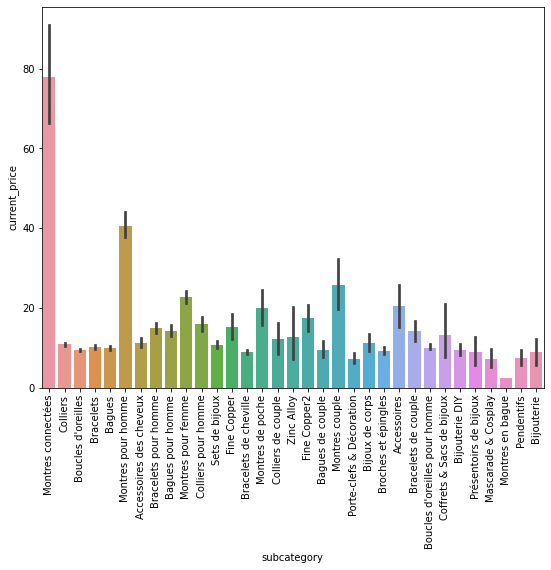

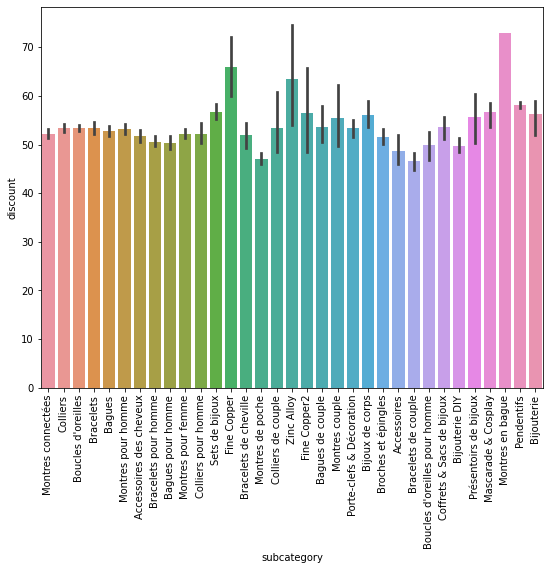

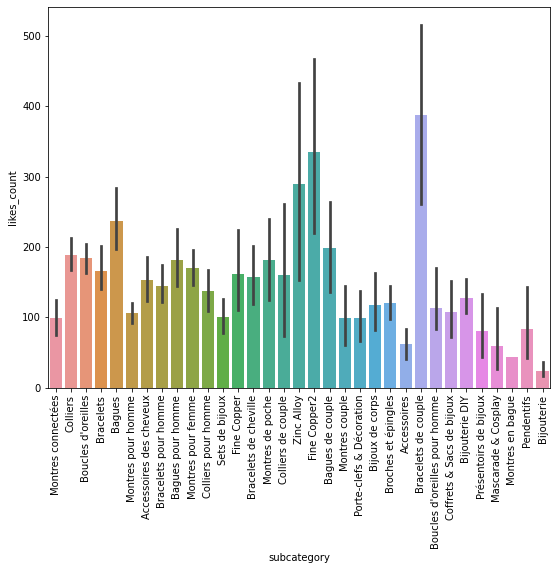

In [19]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=data,x=i,y=j)
        plt.xticks(rotation=90)
        plt.show()

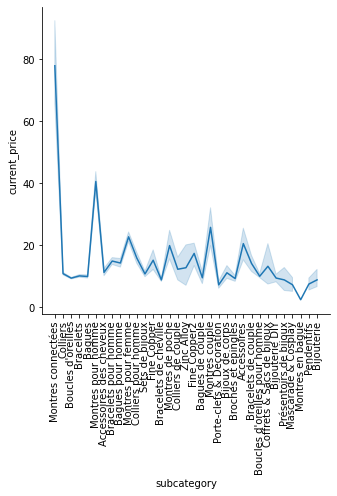

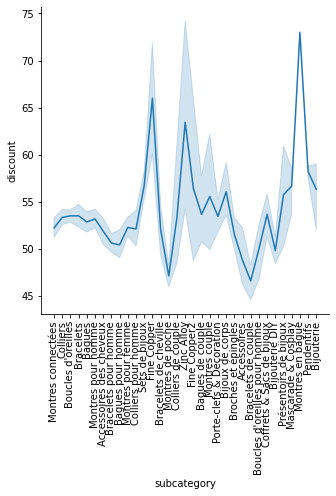

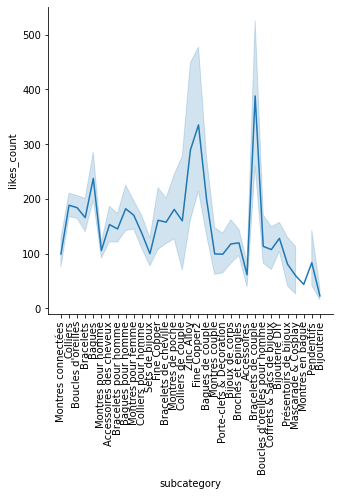

In [20]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.relplot(data=data,x=i,y=j,kind='line')
        plt.xticks(rotation=90)
        plt.show()

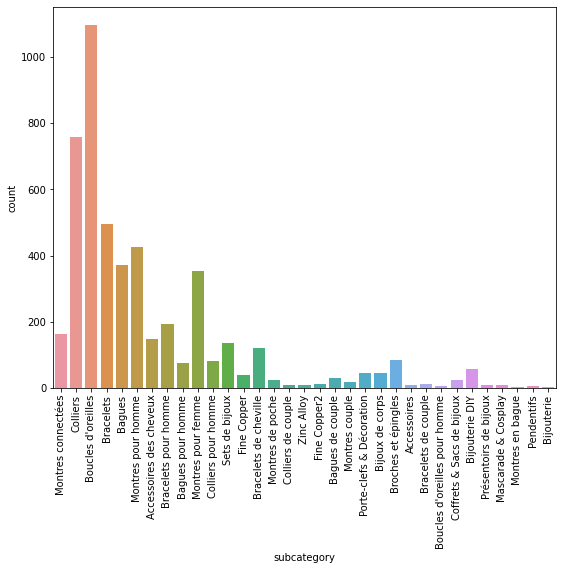

In [21]:
plt.figure(figsize=(9,7))
sns.countplot(data=data,x='subcategory')
plt.xticks(rotation=90)
plt.show()

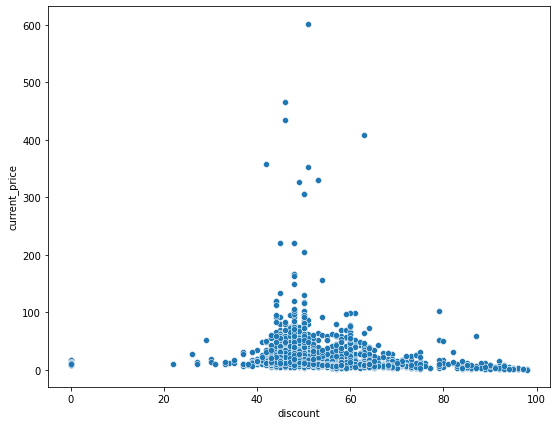

In [22]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='discount',y='current_price')
plt.show()

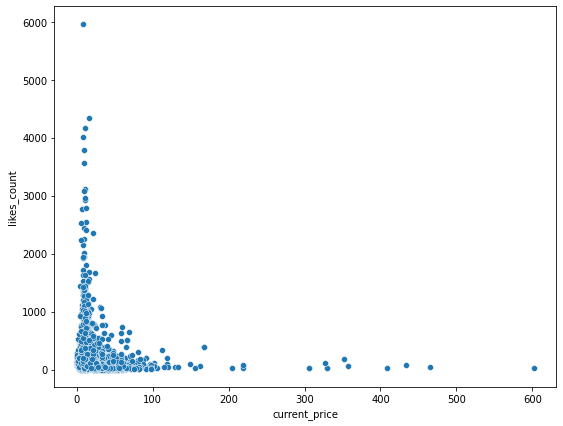

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='current_price',y='likes_count')
plt.show()

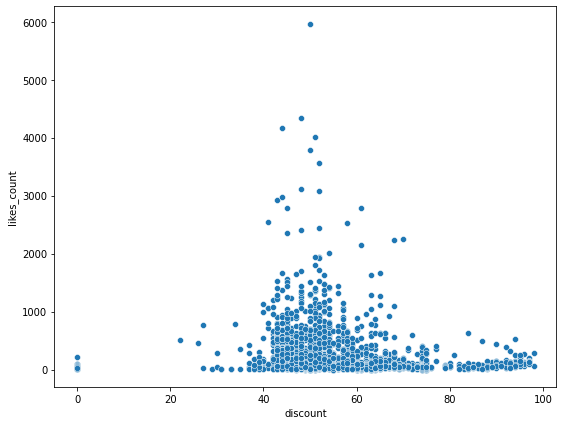

In [24]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='discount',y='likes_count')
plt.show()

In [25]:
data[data['current_price']>150].shape

(19, 4)

In [26]:
data=data[data['current_price']<150]

In [27]:
data[data['discount']<30].shape

(63, 4)

In [28]:
data=data[data['discount']>30]

In [29]:
data[data['likes_count']>3500].shape

(6, 4)

In [30]:
data=data[data['likes_count']<3500]

In [31]:
data[data['current_price']>150].shape

(0, 4)

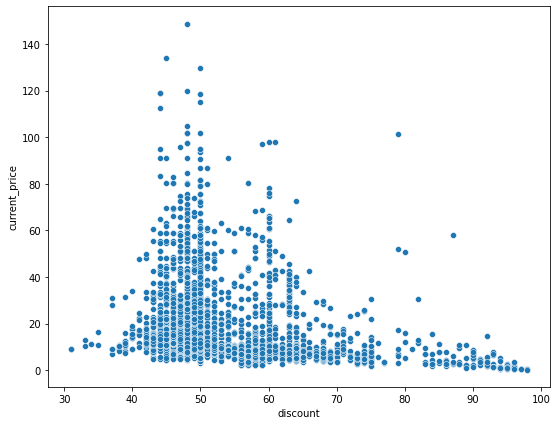

In [32]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='discount',y='current_price')
plt.show()

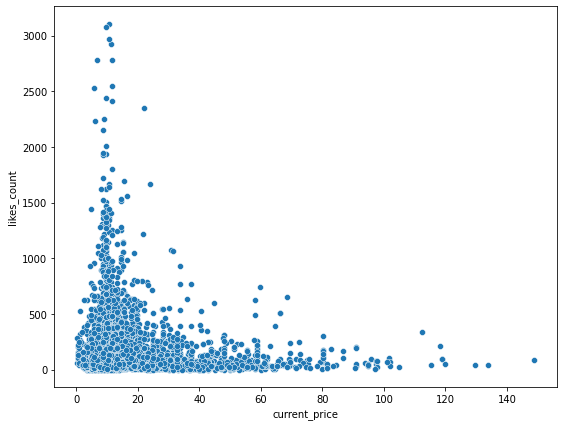

In [33]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='current_price',y='likes_count')
plt.show()

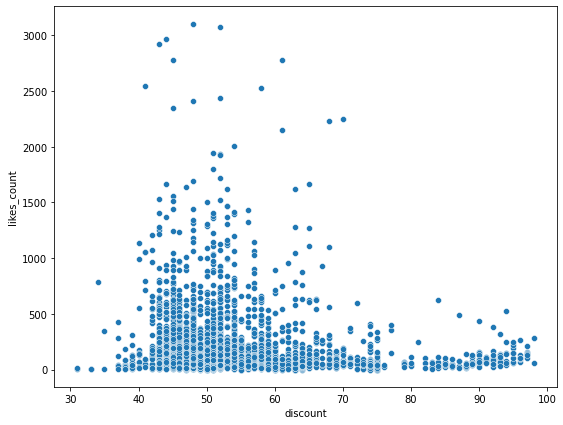

In [34]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='discount',y='likes_count')
plt.show()

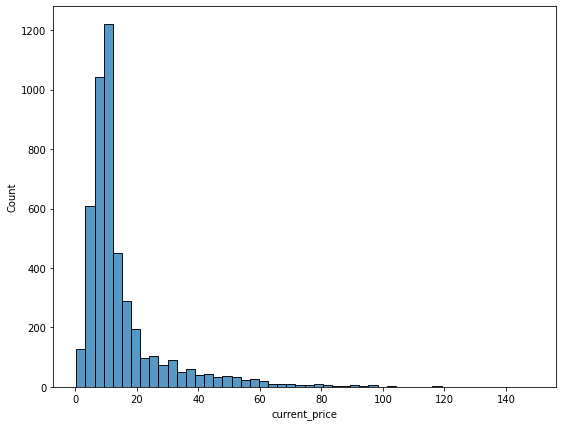

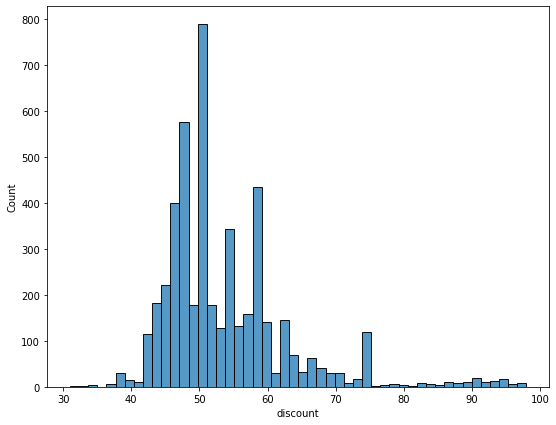

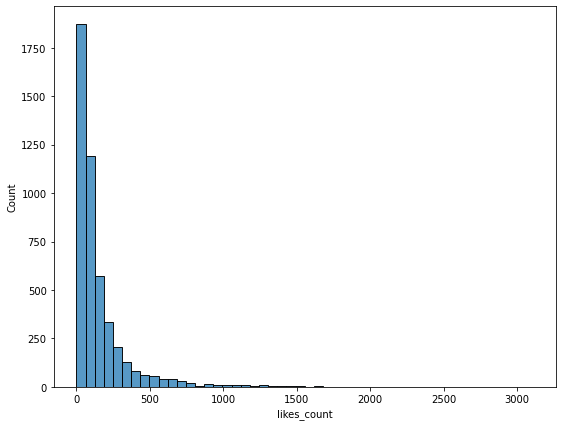

In [35]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.histplot(data=data,x=i,bins=50)
    plt.show()

In [36]:
data[data['current_price']>40].shape

(343, 4)

In [37]:
data=data[data['current_price']<40]

In [38]:
data[data['discount']>70].shape

(291, 4)

In [39]:
data=data[data['discount']<70]

In [40]:
data[data['discount']<42].shape

(68, 4)

In [41]:
data=data[data['discount']>42]

In [42]:
data[data['likes_count']>500].shape

(294, 4)

In [43]:
data=data[data['likes_count']<500]

In [44]:
data.shape

(3723, 4)

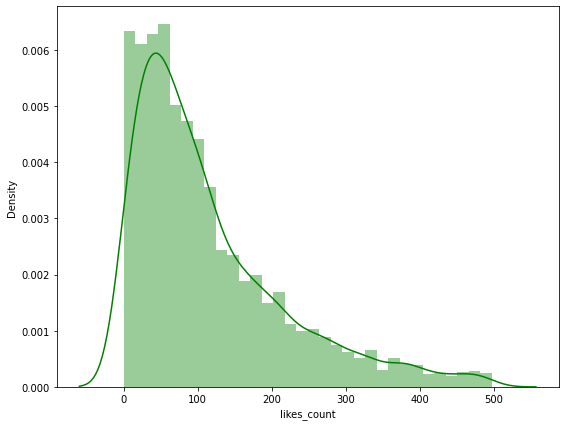

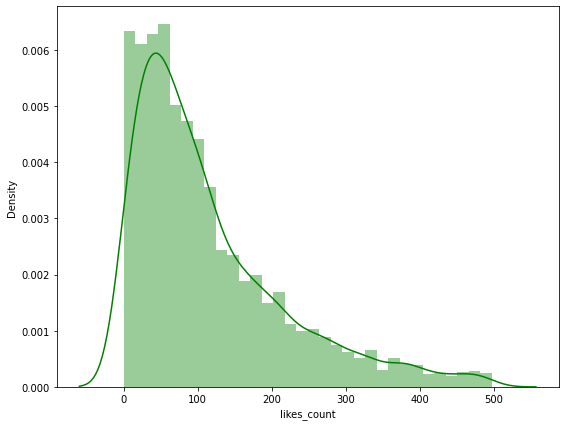

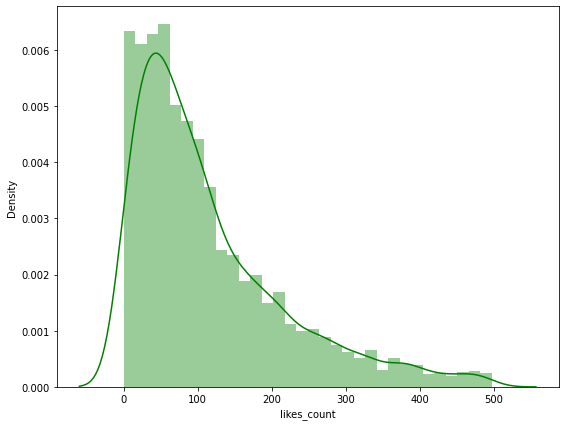

In [45]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.distplot(data[column],color='green')
    plt.show()

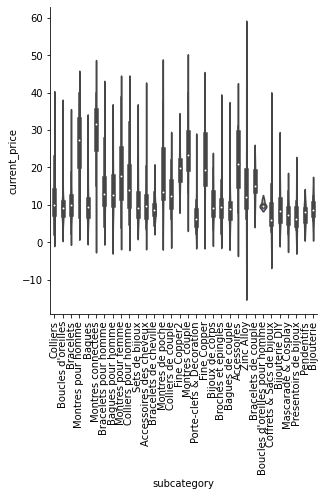

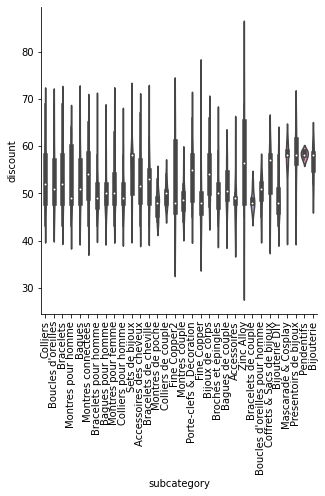

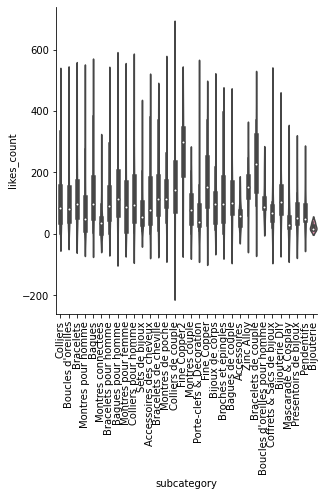

In [49]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.catplot(data=data,x=i,y=j,kind='violin')
        plt.xticks(rotation=90)
        plt.show()

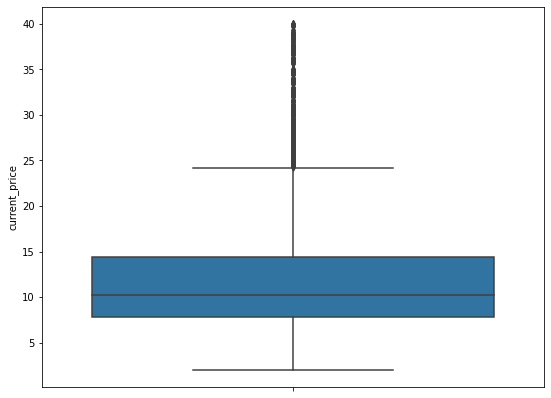

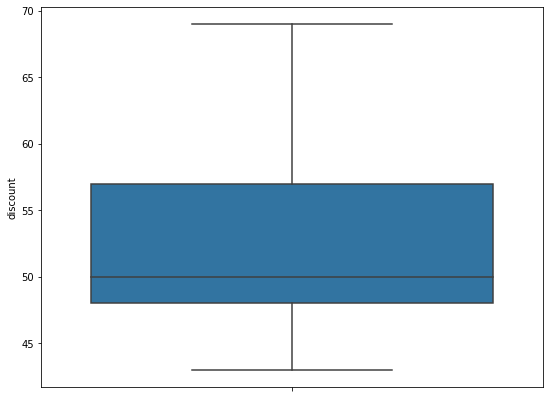

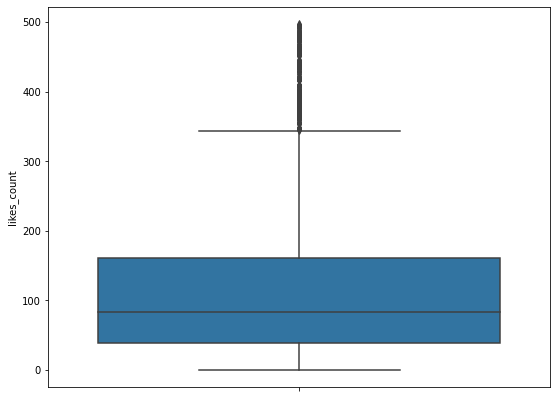

In [50]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=data,y=i)
    plt.show()

In [51]:
data[data['current_price']>24].shape

(363, 4)

In [52]:
data=data[data['current_price']<24]

In [53]:
data[data['likes_count']>340].shape

(169, 4)

In [54]:
data=data[data['likes_count']<340]

In [55]:
data.shape

(3190, 4)

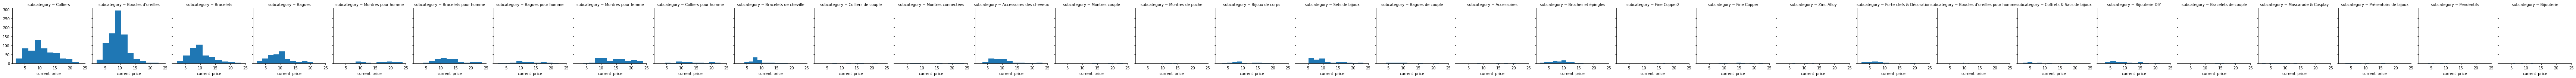

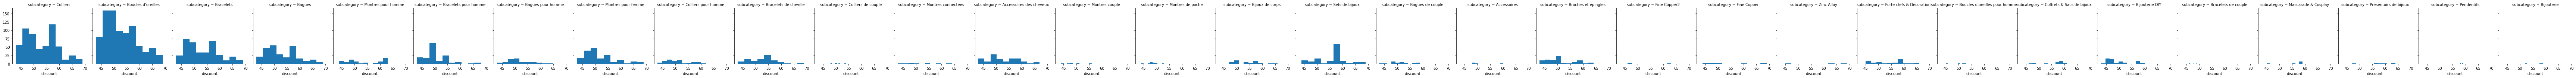

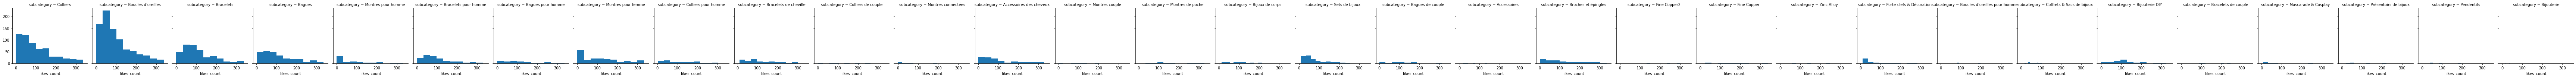

In [57]:
for i in categorical_columns:
    for j in numerical_columns:
        b=sns.FacetGrid(data=data,col=i)
        b.map(plt.hist,j)
        plt.show()

In [58]:
data.sample(5)

,subcategory,current_price,discount,likes_count
1354,Sets de bijoux,22.53,47,216
2681,Montres pour femme,8.99,55,5
4185,Bagues,4.99,65,111
2979,Colliers,9.59,51,119
468,Bracelets,12.99,48,7


In [59]:
data2=data[['current_price','likes_count']]
data2.sample(5)

,current_price,likes_count
927,14.88,194
162,15.04,193
1960,10.44,245
2201,11.42,124
1489,22.53,104


In [64]:
pipeline=Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
    ('scaler',StandardScaler())
])

In [65]:
data3=pipeline.fit_transform(data2)

In [67]:
data3

array([[-0.10872732,  0.47929701],
       [-1.0248034 ,  0.06882527],
       [-0.79578438,  1.49925707],
       ...,
       [ 2.37154868,  2.92968887],
       [ 2.02802015,  1.10122387],
       [-0.69272582,  1.18829364]])

In [70]:
inertia,sil=[],[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data3)
    inertia.append(kmeans.inertia_)
    s=silhouette_score(data3,kmeans.labels_)
    sil.append(s)

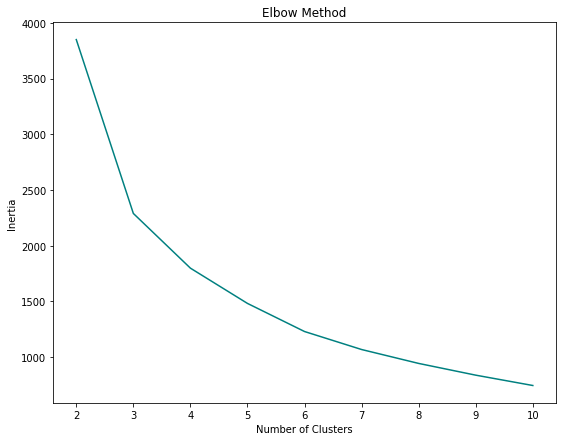

In [72]:
plt.figure(figsize=(9,7))
plt.plot(range(2,11),inertia,color='teal')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

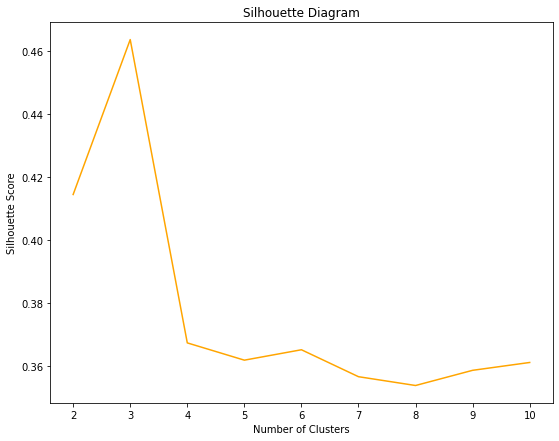

In [73]:
plt.figure(figsize=(9,7))
plt.plot(range(2,11),sil,color='orange')
plt.title('Silhouette Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [74]:
km_model1=KMeans(n_clusters=3,init='k-means++')
km_model1.fit(data3)

KMeans(n_clusters=3)

In [75]:
km_model1.labels_

array([0, 1, 0, ..., 0, 2, 0])

In [76]:
data2['km_model1']=km_model1.labels_

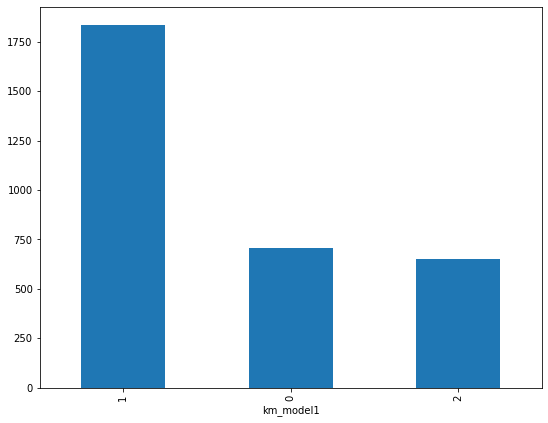

In [77]:
data2['km_model1'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

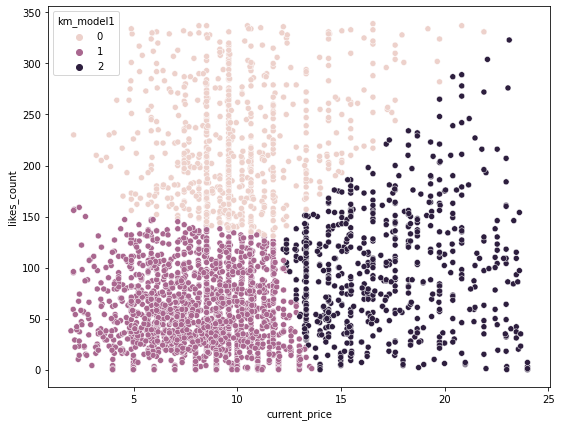

In [78]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data2,x='current_price',y='likes_count',hue='km_model1')
plt.show()

In [79]:
km_model2=KMeans(n_clusters=4,init='k-means++')
km_model2.fit(data3)

KMeans(n_clusters=4)

In [80]:
km_model2.labels_

array([3, 0, 3, ..., 1, 1, 3])

In [82]:
data2['km_model2']=km_model2.labels_

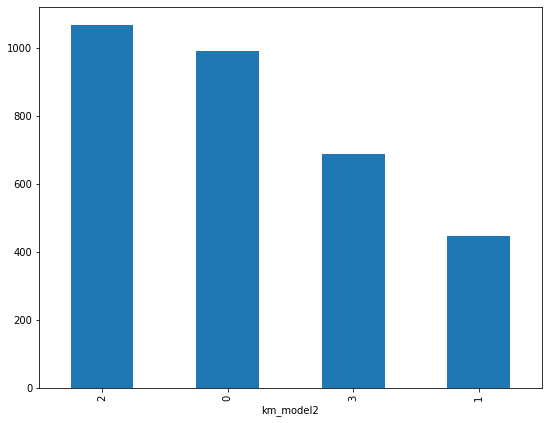

In [83]:
data2['km_model2'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

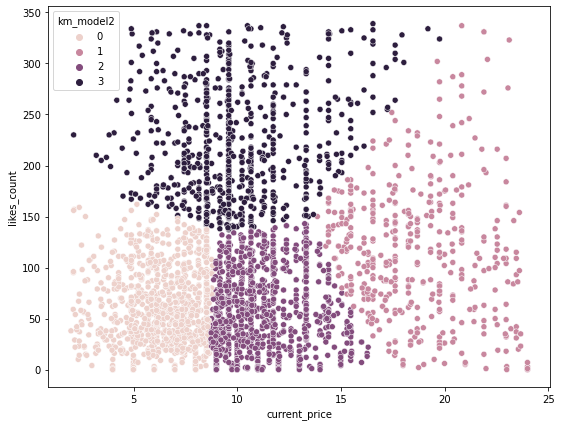

In [84]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data2,x='current_price',y='likes_count',hue='km_model2')
plt.show()

In [86]:
sil_a=[]
for i in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=i,linkage='average')
    agglo.fit(data2)
    si=silhouette_score(data2,agglo.labels_)
    sil_a.append(si)

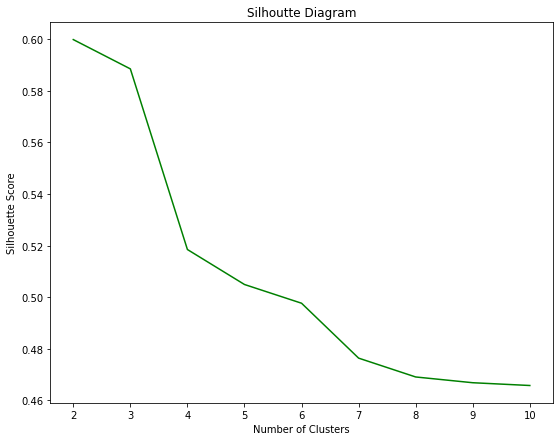

In [87]:
plt.figure(figsize=(9,7))
plt.plot(range(2,11),sil_a,color='green')
plt.title('Silhoutte Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [88]:
agg_model=AgglomerativeClustering(n_clusters=2,linkage='average')
agg_model.fit(data2)

AgglomerativeClustering(linkage='average')

In [89]:
data2['agg_model']=agg_model.labels_

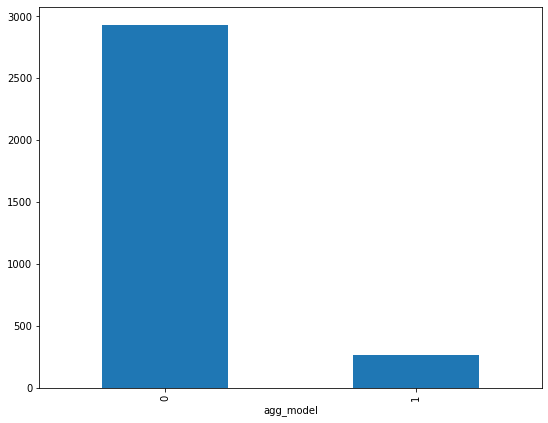

In [90]:
data2['agg_model'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

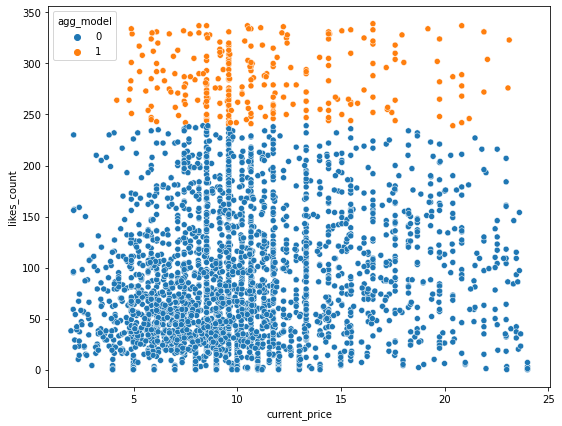

In [91]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data2,x='current_price',y='likes_count',hue='agg_model')
plt.show()

In [92]:
agg_model2=AgglomerativeClustering(n_clusters=3,linkage='average')
agg_model2.fit(data2)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [93]:
data2['agg_model2']=agg_model2.labels_

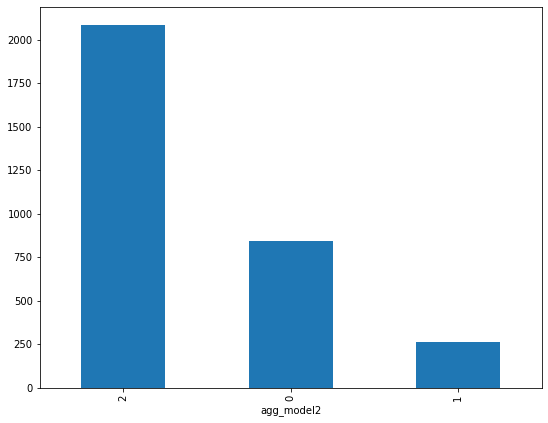

In [95]:
data2['agg_model2'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

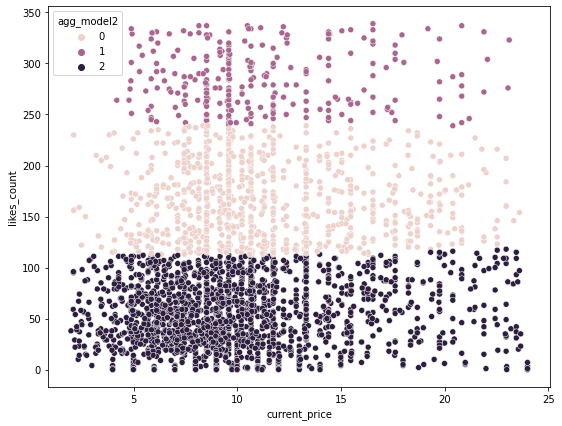

In [96]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data2,x='current_price',y='likes_count',hue='agg_model2')
plt.show()

In [97]:
agg_model3=AgglomerativeClustering(n_clusters=4,linkage='average')
agg_model3.fit(data2)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [98]:
data2['agg_model3']=agg_model3.labels_

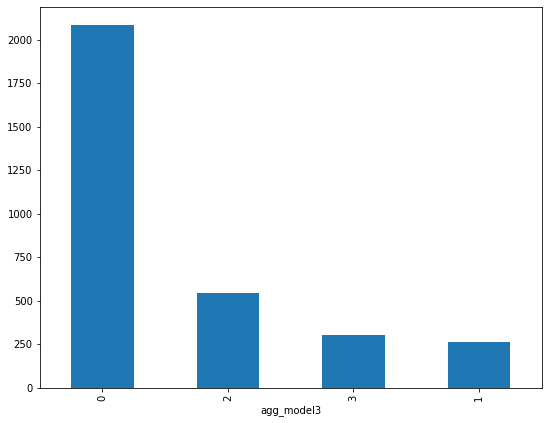

In [99]:
data2['agg_model3'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

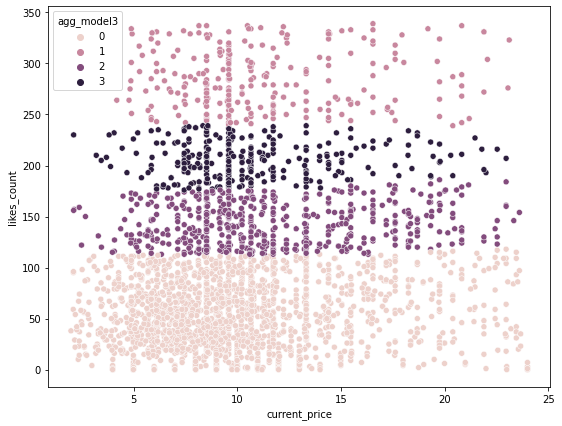

In [100]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data2,x='current_price',y='likes_count',hue='agg_model3')
plt.show()